In [79]:
import glob, json
import cv2
import matplotlib.pyplot as plt

drL, gtL = sorted(glob.glob("./.temp_files/*_dr.json")), sorted(glob.glob("./.temp_files/*_ground_truth.json"))
print(drL, "\n", gtL[:2])

drL0L, gtL0L = json.load(open(drL[0],"r")), json.load(open(gtL[0],"r"))
print( len(drL0L), drL0L[0] )
print( len(gtL0L), gtL0L[0] )

['./.temp_files/0_dr.json', './.temp_files/1_dr.json', './.temp_files/2_dr.json', './.temp_files/3_dr.json'] 
 ['./.temp_files/1025_1335_01642_ground_truth.json', './.temp_files/1025_1335_01643_ground_truth.json']
2004 {'confidence': '0.7389', 'file_id': '1025_1357_00590', 'bbox': '878 558 1182 713'}
1 {'class_name': '2', 'bbox': '126 513 314 719', 'used': False}


In [80]:
detect = { path.split("/")[-1].replace("_ground_truth.json",""):{'boxes':[],'cids':[],'cfs':[]} for path in gtL }
# file_id->[{'boxes':[[int]],'cids':[int],'cfs':[float]}]
for c,drLc in enumerate(drL):
    drLcL = json.load(open(drLc,"r"))
    for d in drLcL:
        file_id, conf, (xmin,ymin,xmax,ymax) = d['file_id'], d['confidence'], d['bbox'].split(" ")      
        detect[file_id]["boxes"].append( [int(xmin),int(ymin),int(xmax),int(ymax)] )
        detect[file_id]["cids"].append( c )
        detect[file_id]["cfs"].append( round(float(conf),4) )
print(detect['1025_1335_01819'])

myD = json.load(open("myD.json","r"))
rank = sorted([ (myD[key][0]-myD[key][1],key) for key in myD ])
print(rank[0], rank[-1])

{'boxes': [[1163, 383, 1216, 499], [93, 83, 152, 210], [363, 122, 422, 244], [47, 35, 107, 166], [1194, 80, 1249, 203], [1009, 320, 1064, 436], [181, 252, 238, 378], [321, 440, 378, 560], [866, 493, 925, 612], [216, 148, 272, 271], [1176, 262, 1228, 380], [388, 328, 446, 449], [406, 535, 468, 639], [464, 146, 521, 270], [412, 227, 469, 350], [250, 182, 307, 305], [38, 239, 99, 365], [147, 320, 205, 442], [159, 17, 218, 140], [7, 129, 68, 252], [116, 17, 176, 145], [114, 347, 171, 471], [1045, 227, 1102, 351], [326, 233, 384, 357], [1186, 163, 1241, 286], [281, 317, 339, 442], [702, 16, 762, 142], [228, 252, 287, 376], [6, 312, 66, 435], [306, 112, 366, 237], [866, 16, 927, 143], [430, 49, 489, 172], [516, 60, 577, 190], [253, 67, 313, 195], [59, 363, 119, 488], [961, 452, 1016, 569], [1133, 38, 1191, 163], [1091, 117, 1149, 241], [159, 386, 214, 509], [205, 39, 266, 168], [13, 8, 71, 132], [1011, 28, 1070, 154], [384, 46, 446, 178], [137, 204, 195, 332], [1093, 304, 1152, 430], [54, 45

In [81]:
scoreD = {}
for score in map(lambda tup:tup[0],rank):
    scoreD[score] = scoreD[score]+1 if score in scoreD else 1
print(sorted(scoreD.items()))

[(-100, 7), (-99, 19), (-98, 43), (-97, 78), (-96, 128), (-95, 179), (-94, 209), (-93, 276), (-92, 309), (-91, 276), (-90, 284), (-89, 283), (-88, 264), (-87, 248), (-86, 224), (-85, 183), (-84, 127), (-83, 93), (-82, 76), (-81, 48), (-80, 31), (-79, 19), (-78, 9), (-77, 13), (-76, 9), (-75, 9), (-74, 7), (-73, 4), (-72, 2), (-70, 1), (-69, 1), (-67, 1)]


0 1025_1335_01809.jpg


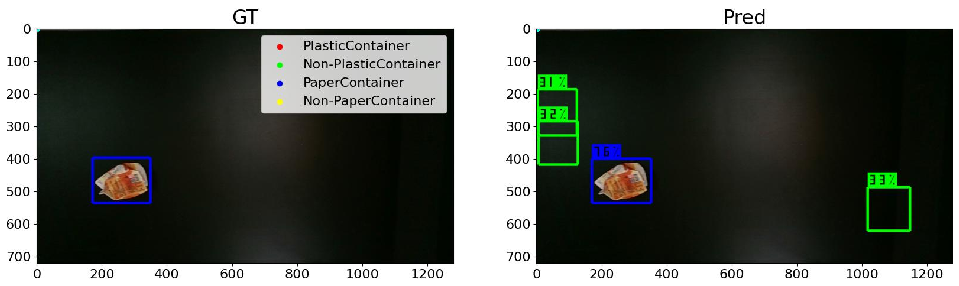

1 1025_1335_01974.jpg


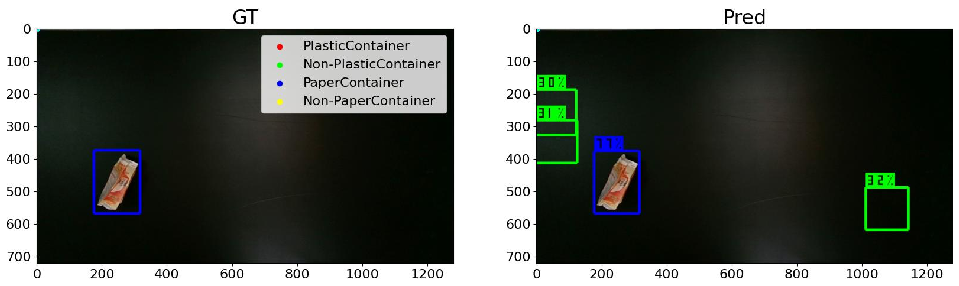

2 1025_1357_00705.jpg


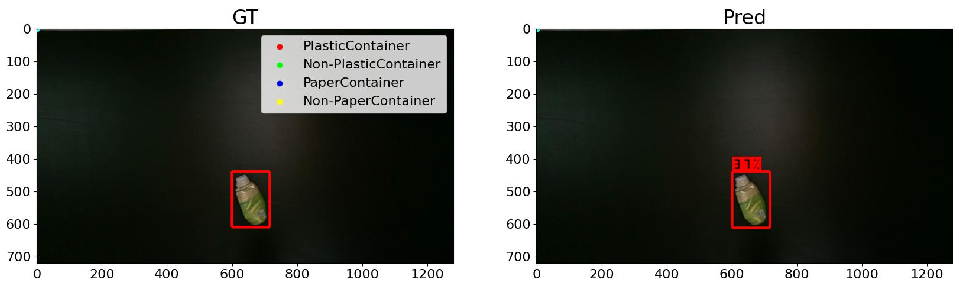

In [84]:
for i in range(3):
    score, pretext = rank[i]
    print(f"{i} {pretext}.jpg")
    img = cv2.imread(f"../exps/xavier_messy13k_DETReg_fine_tune_full_coco/jpg/{pretext}.jpg")[270:730,200:1800,::-1]
    plt.figure(figsize=(20,5))
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
    plt.show()

In [56]:
cv2.imread(f"../data/labv2/test/2d_yoloInt_img/1025_1335_01871.jpg").shape

(720, 1280, 3)

In [57]:
!cat ../exps/DETReg_fine_tune_full_coco/txt/1025_1335_01871.txt

2 0.501 435 283 627 414
3 0.2055 287 388 443 501
1 0.17 1081 517 1189 671


In [59]:
!cat ../data/labv2/test/2d_yoloInt_gt/1025_1335_01871.txt

2 438 282 624 410
2 1129 396 1280 569


In [60]:
!cat ../data/labv2/test/2d_yoloInt_gt_b/1025_1335_01871.txt

2 438 282 624 410
2 1129 396 1280 569


In [58]:
!cat ../data/labv2/test/clean2dr/1025_1335_01871.txt

2 0.414844 0.480556 0.145313 0.177778
2 0.941406 0.670139 0.117188 0.240278

In [64]:
!cat ../data/labv2/test/2d_yoloInt_gt/1025_1335_01898.txt

2 743 78 910 238


In [65]:
!cat ../exps/DETReg_fine_tune_full_coco/txt/1025_1335_01898.txt

2 0.4797 742 80 911 237
2 0.2916 1102 21 1235 76
3 0.2384 485 350 562 390
